# Which version of the website should you use?

## 📖 Background
You work for an early-stage startup in Germany. Your team has been working on a redesign of the landing page. The team believes a new design will increase the number of people who click through and join your site. 

They have been testing the changes for a few weeks and now they want to measure the impact of the change and need you to determine if the increase can be due to random chance or if it is statistically significant.

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import scipy.stats as stats

In [ ]:
import pandas as pd
df = pd.read_csv('./data/redesign.csv')
df.head()

,treatment,new_images,converted
0,yes,yes,0
1,yes,yes,0
2,yes,yes,0
3,yes,no,0
4,no,yes,0


# Conversion rate
The conversion rate for the control group is the lowest of all possible combinations. This means, every test applied yielded an improvement (if statistically significant, which is still to be checked). The best conversion rate was achieved when showing the **new** landing page and the **old** images. 

<AxesSubplot:xlabel='new_images', ylabel='treatment'>

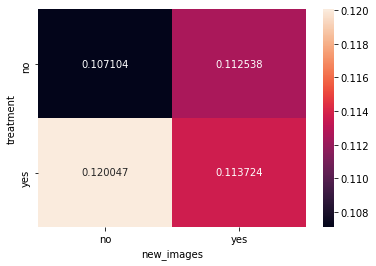

In [ ]:
grouped = df.groupby(['treatment', 'new_images'])

rates = pd.DataFrame(grouped.sum()/grouped.count()).reset_index().pivot(index='treatment', columns='new_images', values='converted')

sns.heatmap(rates, annot=True, fmt='g')

# Statistical significance
As the maximum p-value is roughly 0.003, the results can be considered statistically significant. Therefore, the improve in conversion rate is not explained by randomness. For the best conversion rates, the company should publish the website using the **new** landing page and the **old** images.

In [ ]:
def get_pvalue(con_conv, test_conv, con_size, test_size):  
    lift =  - abs(test_conv - con_conv)

    scale_one = con_conv * (1 - con_conv) * (1 / con_size)
    scale_two = test_conv * (1 - test_conv) * (1 / test_size)
    scale_val = (scale_one + scale_two)**0.5

    p_value = 2 * stats.norm.cdf(lift, loc = 0, scale = scale_val )

    return p_value

In [ ]:
display(grouped.count().reset_index().pivot(index='treatment', columns='new_images', values='converted'))

new_images,no,yes
treatment,,
no,10121,10121
yes,10121,10121


In [ ]:
con_size = 10121
test_size = 10121

max_pvalue = get_pvalue(rates.min().min(), rates.max().max(), con_size, test_size)

print('Maximum p-value: ', max_pvalue)

Maximum p-value:  0.0037020412269646225
